# Advanced Business Analytics (CIS442D)

## Homework Assignment 2
### Due date: 1/17/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

# (1) json and web-services
In this exercise, you will use the open database <a>opencorporates.com</a> to create a DataFrame holding information about companies. Search the words "mckinsey company" and  based on the results, create a DataFrame that contains companies numbers, companies names, country and localty using the corresponding attributes from the database API (see the inclass example).

In [1]:
# write solution here
import requests
import json
import pandas as pd
from pandas import DataFrame

page = requests.get('https://api.opencorporates.com/v0.4/companies/search?q=mckinsey+company')
data = json.loads(page.text)
frame_data = []

for c in data['results']['companies']:
    number     = c['company']['company_number']
    name       = c['company']['name']
    if (c['company']['registered_address'] != None):
        country = c['company']['registered_address']['country']
        locality =  c['company']['registered_address']['locality']
    else:
        country = "N/A"
        locality = "N/A"
    frame_data.append({'number':number, 'name':name, 'country': country, 'locality':locality})
    
df = DataFrame(frame_data, columns = ['number','name','country','locality']) 
df.head()


,number,name,country,locality
0,22138811,"""MCKINSEY & COMPANY SRL""",Romania,"""Bucureşti Sectorul 1"""
1,516402-1072,"""McKinsey & Company, Inc. Sweden (USA) svensk ...",N/A,N/A
2,08271775,08271775 LTD,England,London
3,08445513,BERKELEY MCKINSEY & COMPANY LTD,United Kingdom,Maidenhead
4,0125325900,EVANS-MCKINSEY & COMPANY,United States,None


# (2) Databases and sql
The file "pageviews" contains a table with 4 columns.
1. Load the data file into a table in the empty database "empty_db.sqlite".
2. Write and execute a sql query that computes the sum of the third column of the newly created table.

In [10]:
# write solution here
import sqlite3
import pandas as pd
import csv

con = sqlite3.connect('empty_db.sqlite')
con.execute("DROP TABLE tbl")
con.execute("CREATE TABLE tbl(col1 TEXT, col2 TEXT, col3 INTEGER, col4 INTEGER);")

with open('pageviews', encoding='utf-8') as f:
    reader = csv.reader(f,delimiter = ' ')
    for row in reader:
        con.execute("INSERT INTO tbl VALUES %s"%str(tuple(row))) 
    
    df=pd.read_sql_query("SELECT SUM(col3) AS SumThirdCol FROM tbl;",con)
    
con.commit()
con.close()

df


,SumThirdCol
0,233058


# (3) Web-scraping

HTML are XML documents that specify the content and design of web-pages. For example, the file html_example.txt contains the HTML representation of the following table: 

| A | B | C |
|---|---|---|
| D | E | F |


In [88]:
!cat html_example.txt

<TABLE>
    <TR>
        <TD>A</TD>
        <TD>B</TD>
        <TD>C</TD>
    </TR>
    <TR>
        <TD>D</TD>
        <TD>E</TD>
        <TD>F</TD>
    </TR>
</TABLE>


The TABLE element is used to indicate the beginning of the table, TR elements indicate beginning of rows, and TD elements indicate beginning of columns. The text that appears between the TD tags specifies cells content. 

As another example, hyperlinks are specified using the A tag. That is, for a link to the website "http://www.w3schools.com" whose label in a webpage is "Visit W3Schools.com", there is a corresponding A element (that is, an element whose tag is A). The file html_example2.txt contains the HTML specification for this link:

In [89]:
!cat html_example2.txt

<a href="http://www.w3schools.com">Visit W3Schools.com!</a> 


Pick a Wikipedia article of your choice. 
1. Print all hyperlinks appearing your article (links to other websites or wikipedia pages)
2. Print a list with Wikipedia articles referenced from your chosen article
3. Choose a webpage (not necessarily in Wikipedia) that contains tabular information. Write code that reads the webpage and creates a DataFrame, which contains that table.

In [2]:
# write solution here
import sqlite3
import pandas as pd

# (4) numpy, pandas, and Visualization
pandas provides a simple interface for downloading data from various online sources such as Google finance, the World Bank, and the OECD (see for example <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance">Yahoo! Finance</a>). 
The code below shows an example for extracting data on Google and IBM stocks. 

Pick 5 stocks of your choice.
1. Create a dataframe holding the closing price for each stock in the last year.
2. By how much (in percents) did the price of each stock vary over the last year? Draw a barplot, in which the x-axis represents stocks, and the y-axis represents the change in percents.
3. Generate a random array of 5 integers between 10-100 that represent the number of stocks in your protfolio. 
   1. Draw a pie chart representing the composition of your protfolio at the beginning of year (in US$). 
   2. Plot the daily value of your protfolio over the last year.
4. Plot a scatter matrix to check for correlations in the daily changes of stock prices.

In [11]:
#Sample code given.
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 7)
symbols = ["IBM"]
f = web.DataReader(symbols, 'yahoo', start, end)
df_ibm = f.minor_xs('IBM')
type(df_ibm['Close'])



pandas.core.series.Series

In [12]:
# write solution here
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
%matplotlib inline

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)
symbols = ['IBM','AAPL','NVDA','FB','JPM']
f = web.DataReader(symbols, 'yahoo', start, end)

#1. Create a dataframe holding the closing price for each stock in the last year.

df_ibm = f.minor_xs('IBM')
df_aapl = f.minor_xs('AAPL')
df_nvda = f.minor_xs('NVDA')
df_fb = f.minor_xs('FB')
df_jpm = f.minor_xs('JPM')

df = pd.DataFrame({'IBM':df_ibm['Close'],'AAPL':df_aapl['Close'],'NVDA':df_nvda['Close'],'FB':df_fb['Close'], 'JPM':df_jpm['Close']})
df.head()


,AAPL,FB,IBM,JPM,NVDA
Date,,,,,
2016-01-04,105.349998,102.220001,135.949997,63.619999,32.369999
2016-01-05,102.709999,102.730003,135.850006,63.730000,32.889999
2016-01-06,100.699997,102.970001,135.169998,62.810001,31.530001
2016-01-07,96.449997,97.919998,132.860001,60.270000,30.280001
2016-01-08,96.959999,97.330002,131.630005,58.919998,29.629999


AAPL    105.349998
FB      102.220001
IBM     135.949997
JPM      63.619999
NVDA     32.369999
Name: 2016-01-04 00:00:00, dtype: float64
AAPL    115.820000
FB      115.050003
IBM     165.990005
JPM      86.290001
NVDA    106.739998
Name: 2016-12-30 00:00:00, dtype: float64


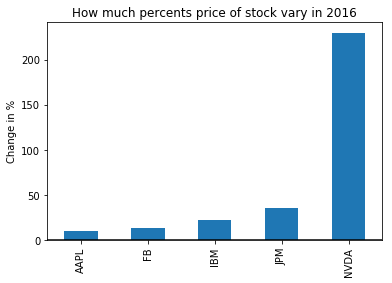

In [13]:
#2. Barplot in which the x-axis represents stocks, and the y-axis represents the change in percents,
#   By how much (in percents) did the price of each stock vary over the last year.
prices_start = df.iloc[0]
prices_end = df.iloc[-1]
print(prices_start)
print(prices_end)
df.iloc[[0,-1]]
((prices_end-prices_start)/prices_start*100).plot.bar()
plt.gca().axhline(0,color='k')
plt.ylabel("Change in %")
plt.title("How much percents price of stock vary in 2016")



In [14]:
number_rand = random.sample(range(10,100),5) # 5 random numbers as number of stocks.
print(number_rand)
value = prices_start*number_rand
value_idx = pd.Series(number_rand,index=prices_start.index) 
# Add to dataframe Value of Portfolio at all the dates of last year.
df['PortfolioValue'] = df.apply(lambda row:(row*value_idx).sum(),axis=1)
df.tail()



[30, 26, 99, 12, 52]


,AAPL,FB,IBM,JPM,NVDA,PortfolioValue
Date,,,,,,
2016-12-23,116.519997,117.269997,166.710007,87.050003,109.779999,29802.070509
2016-12-27,117.260002,118.010002,167.139999,87.129997,117.320000,30279.119977
2016-12-28,116.760002,116.919998,166.190002,86.500000,109.250000,29714.530206
2016-12-29,116.730003,116.349998,166.600006,85.889999,111.430000,29845.440620
2016-12-30,115.820000,115.050003,165.990005,86.290001,106.739998,29484.870481


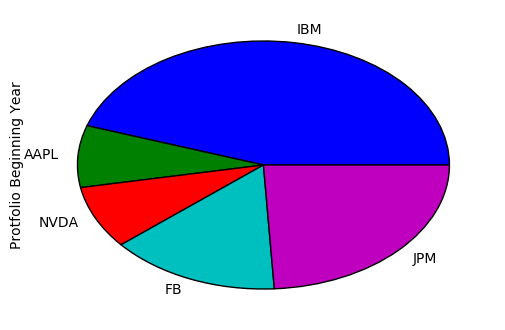

In [70]:
#3 (A): Draw a pie chart representing the composition of your protfolio at the beginning of year (in US$).

s = pd.Series(value,index=symbols,name='Protfolio Beginning Year')
s.plot.pie()

#colors = ['yellow', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#s.plot.pie(s, labels=symbols, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
#plt.axis('equal')


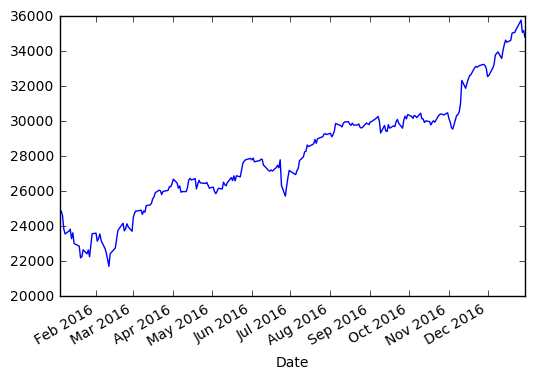

In [71]:
#3 (B): Plot the daily value of your protfolio over the last year.
df['PortfolioValue'].plot()


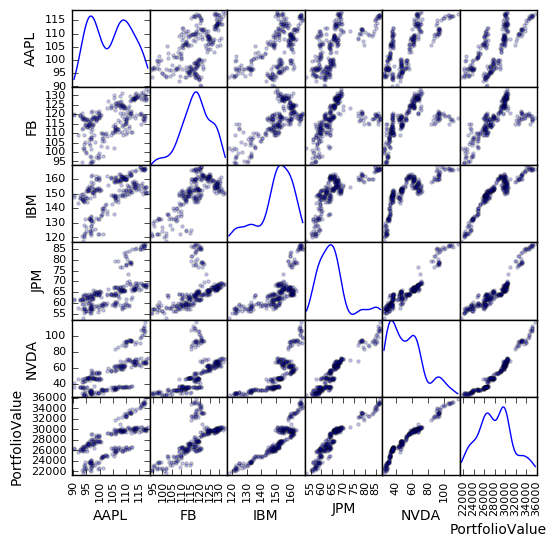

In [72]:
#Plot a scatter matrix to check for correlations in the daily changes of stock prices.
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(df)
x = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')